#### 1. Google Play Store Apps and Reviews

In [25]:
#Importing panda package
import pandas as pd

In [26]:
#Reading the dataset apps.csv
apps=apps_with_duplicates = pd.read_csv('./datasets/apps.csv')

In [27]:
#Printing total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

Total number of apps in the dataset =  9659


In [47]:
#A glimpse of the dataset(i.e ten rows)
print(apps.sample(10))

      Unnamed: 0                                                App  \
2228        2845       Sweet Camera - Selfie Filters, Beauty Camera   
2789        3535                            ColorNote Notepad Notes   
7531        8626                  Sword Art Online: Integral Factor   
1197        1474  Home Security Camera WardenCam - reuse old phones   
2587        3315                           SuperVPN Free VPN Client   
1079        1309                                   7 Minute Workout   
2523        3251    Samsung Max - Data Savings & Privacy Protection   
5832        6864                                            BV Link   
1570        2005                                Super Jabber Jump 3   
4415        5371         I am Millionaire - Richest guy in the town   

                Category  Rating  Reviews  Size     Installs  Type  Price  \
2228         PHOTOGRAPHY     4.7   233039  24.0   10000000.0  Free   0.00   
2789        PRODUCTIVITY     4.6  2401017   NaN  100000000.0  Fr

#### 2.Data cleaning

In [29]:
#Unnecessary columns are removed
apps.pop('Android Ver')
apps.pop('Current Ver')
apps.pop('Last Updated')
#The list of characters which have to be removed from the data
chars_to_remove=['+',',','$']
#Certain columns which contain data with the characters that has to be removed
cols_to_remove=['Installs','Price']
for i in cols_to_remove:
    for j in chars_to_remove:
        apps[i]=apps[i].apply(lambda x: x.replace(j, ''))
#Column details are printed
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.2+ KB
None


#### 3.Correcting data types 

In [30]:
#Importing numpy library
import numpy as np
# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float')
# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float')
# Checking datatypes of apps.csv
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 830.2+ KB
None


#### 4. Exploring app categories

In [31]:
#Imprted plotly and connected
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Print the total number of unique categories.
num_cat=len(apps['Category'].unique())
print('Number of categories = ',num_cat)
# Count the number of apps in each category. 
numapps_in_cat=apps['Category'].value_counts()
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_numapps_in_cat= numapps_in_cat.sort_values(ascending = False)
data = [go.Bar(x=numapps_in_cat.index,y=numapps_in_cat.values,)]
plotly.offline.iplot(data)

Number of categories =  33


#### 5.Distribution of app ratings

In [32]:
# Average rating of apps
avg_app_rating=apps['Rating'].mean()
print('Average app rating = ',avg_app_rating)
# Distribution of apps according to their ratings
data=[go.Histogram(x=apps['Rating'])]
# Vertical dashed line to indicate the average app rating
layout={'shapes':[{'type':'line','x0':avg_app_rating,'y0':0,
'x1':avg_app_rating,'y1':1000,'line':{'dash':'dashdot'}}]}
plotly.offline.iplot({'data':data,'layout':layout})

Average app rating =  4.173243045387994


#### 6.Size and price of an app

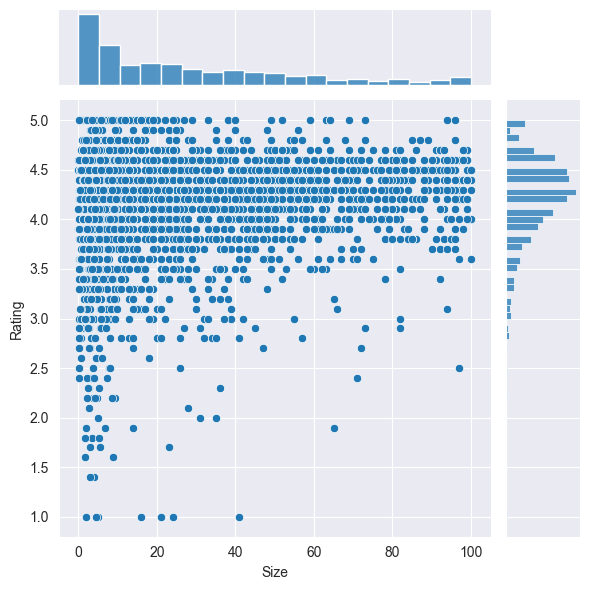

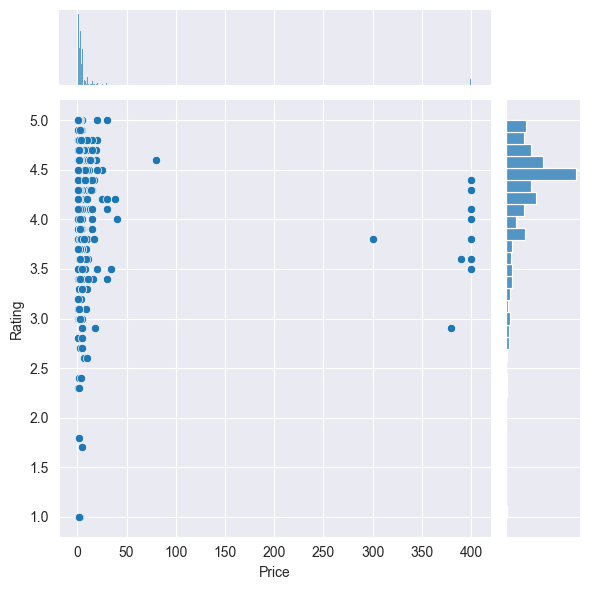

In [33]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
# Select rows where both Rating and Size values are not null
apps_with_size_and_rating=apps[apps.Rating.notnull()&apps.Size.notnull()]
# Subset for categories with at least 500 apps
large_categories=apps_with_size_and_rating.groupby('Category').filter(lambda x:len(x)>=500)
# Plot size vs rating
plt1=sns.jointplot(x=large_categories['Size'],y=large_categories['Rating'])
# Select apps whose Type is Paid
paidapps=apps_with_size_and_rating[apps_with_size_and_rating['Type']=='Paid']
# Plot price vs rating
plt2=sns.jointplot(x=paidapps['Price'],y=paidapps['Rating'])

#### Performace Metrics

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
m=[]
l=[]
m=apps['Installs']
l=apps['Reviews']
m=np.array(m).reshape(-1,1)
l=np.array(l)
model = LinearRegression().fit(m,l)
print(model)
y_pred = model.predict(np.array([[10000]]))
print(y_pred)

LinearRegression()
[51170.00077529]


#### 7.Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


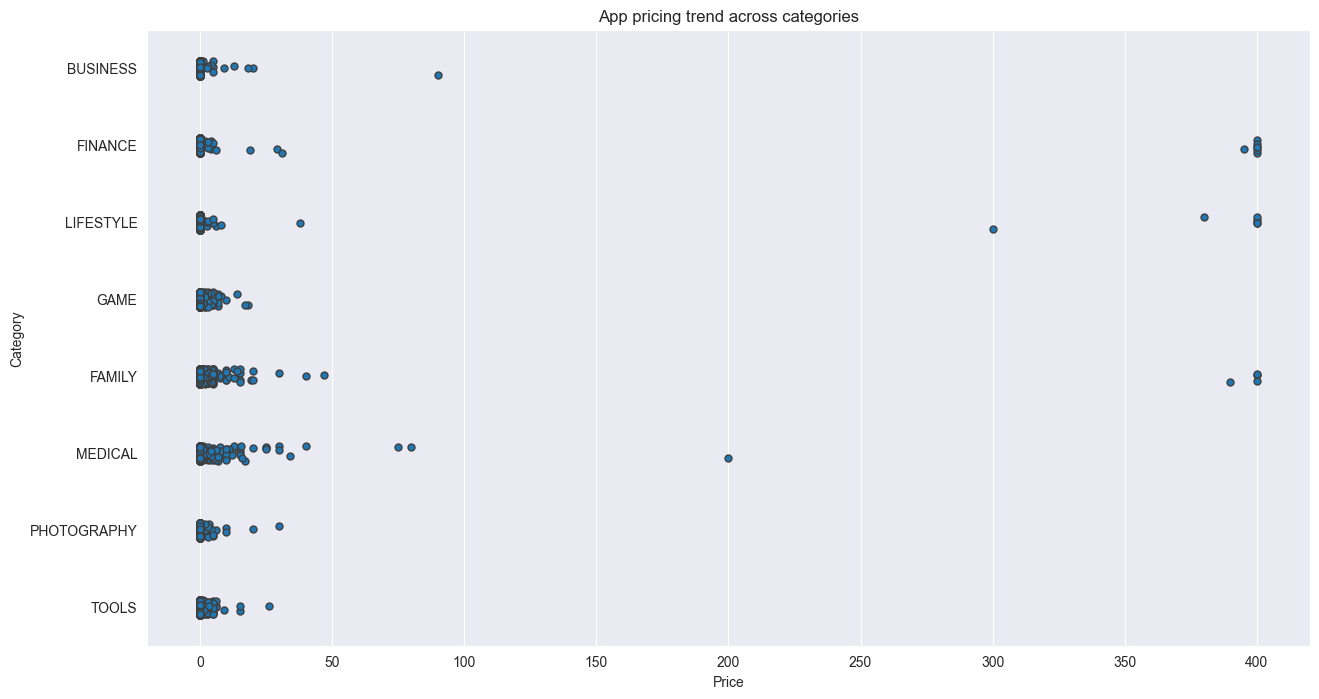

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
#Select few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
# Examine the price trend by plotting price vs category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

#### 8. Filter out junk apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

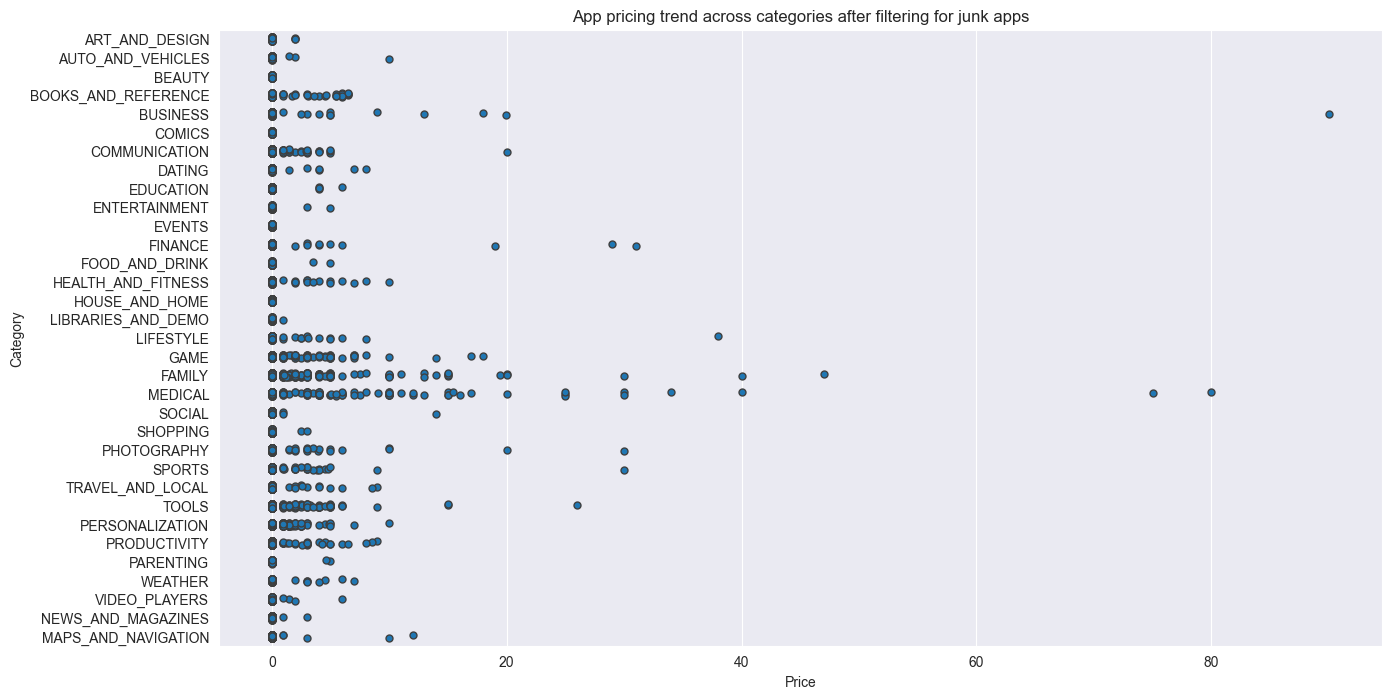

In [36]:
# Select apps priced below $100
apps_under_100 = apps[apps.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

#### 9. Popularity of paid apps vs free apps

In [45]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == "Paid"]['Installs'],name = 'Paid'
)
trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == "Free"]['Installs'],name = 'Free'
)
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)
# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

#### 10.Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

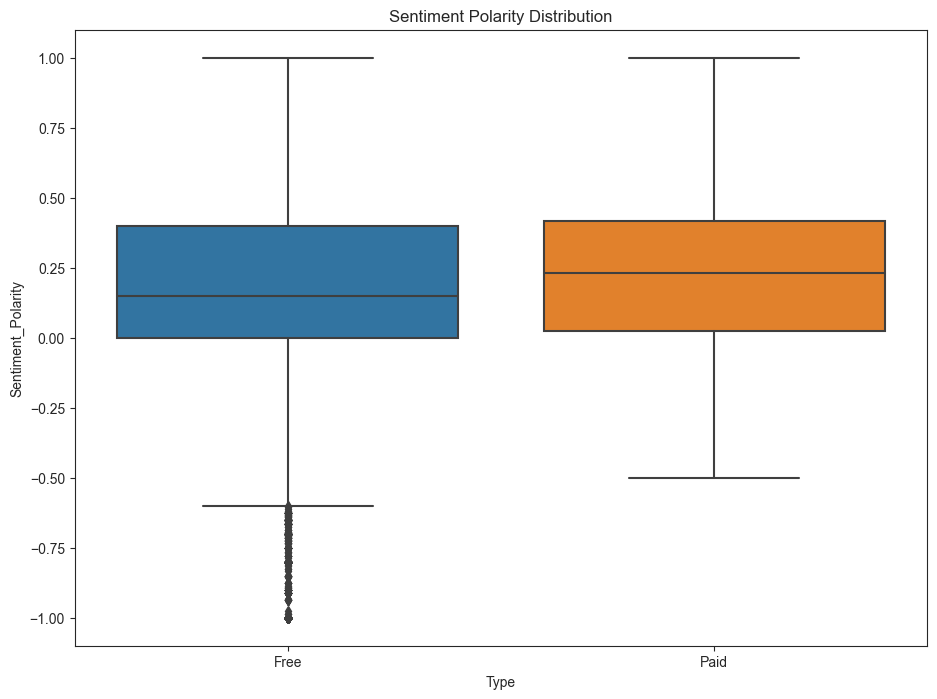

In [38]:
# Load user_reviews.csv
reviews_df = pd.read_csv("./datasets/user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

#### 11.Remove null values from user reviews

In [39]:
reviews_df=reviews_df.dropna()
reviews_df

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


#### 12.Draw histogram to understand user sentiment distribution

<AxesSubplot:>

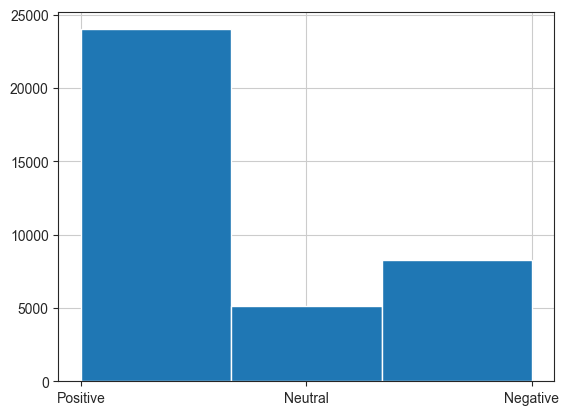

In [40]:
# Sentiment histogram
reviews_df["Sentiment"].hist(bins=3)

#### 13.Few Positive Reviews

In [41]:
reviews_df[reviews_df["Sentiment"]=="Positive"]["Review"].head(20)

0     I like eat delicious food. That's I'm cooking ...
1       This help eating healthy exercise regular basis
3            Works great especially going grocery store
4                                          Best idea us
5                                              Best way
6                                               Amazing
10                                            good you.
11    Useful information The amount spelling errors ...
12    Thank you! Great app!! Add arthritis, eyes, im...
13    Greatest ever Completely awesome maintain heal...
14    Good health...... Good health first priority.....
16    Health It's important world either life . thin...
17    Mrs sunita bhati I thankful developers,to make...
18    Very Useful in diabetes age 30. I need control...
19                                   One greatest apps.
20                                            good nice
21                                Healthy Really helped
23    HEALTH SHOULD ALWAYS BE TOP PRIORITY. !!. 

#### 14.Few Negative Reviews

In [42]:
reviews_df[reviews_df["Sentiment"]=="Negative"]["Review"].head(20)

32                    No recipe book Unable recipe book.
43     Waste time It needs internet time n ask calls ...
68                               Faltu plz waste ur time
85                                     Crap Doesn't work
95     Boring. I thought actually just texts that's i...
132                   No recipe book Unable recipe book.
143    Waste time It needs internet time n ask calls ...
168                              Faltu plz waste ur time
185                                    Crap Doesn't work
195    Boring. I thought actually just texts that's i...
206                  Not bad, price little bit expensive
240                             Horrible ID verification
245                       There is nothing missing ~ !!!
246    Refund takes long.. 3 days still received mone...
253    I am trying to update every time but I do not ...
255                  Icon name is strange after updating
274    It has been slowed down since the last update....
276    If a network error occur

#### 15.Few Neutral Reviews

In [43]:
reviews_df[reviews_df["Sentiment"]=="Neutral"]["Review"].head(20)

8                       Looking forward app,
9      It helpful site ! It help foods get !
22                                God health
25         I found lot wealth form health...
29                               On test....
51                                    I like
56                              This helpful
61                                       Luv
64                      Doesn't work... Zero
86                     This 5 starr Download
87                        I like Was helpful
108                     Looking forward app,
109    It helpful site ! It help foods get !
122                               God health
125        I found lot wealth form health...
129                              On test....
151                                   I like
156                             This helpful
161                                      Luv
164                     Doesn't work... Zero
Name: Review, dtype: object